# Country Dataset 

This dataset contains information about the health, income and gdp of each country's population. Attributes associated are as follows:

 0.   country      
 1.   child_mort  
 2.   exports     
 3.   health      
 4.   imports     
 5.   income        
 6.   inflation   
 7.   life_expec  
 8.   total_fer   
 9.   gdpp      
 
 ### Objective
 Use unsupervised learning K-means Clustering to find out the most poor countries.
 
 ### Tools Required
 Python, Jupyter-Notebook
 
 ### Libraries Used
 Pandas, Matplotlib, KMeans

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as mtp

In [2]:
df = pd.read_csv("C:/Users/admin/Downloads/Country-data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x222ae6d62c8>,
 'caps': [<matplotlib.lines.Line2D at 0x222ae6d6b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ab5e2c48>],
 'medians': [<matplotlib.lines.Line2D at 0x222ae6e5148>],
 'fliers': [<matplotlib.lines.Line2D at 0x222ae6ded48>],
 'means': []}

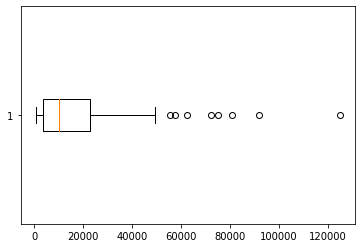

In [5]:
# Checking for outliers
mtp.boxplot(df.income , vert=False)

In [6]:
# Removing Outliers
df['gdpp_std'] = ((df.gdpp - df.gdpp.mean()).apply(abs) / df.gdpp.std())
df['income_std'] = ((df.income - df.income.mean()).apply(abs) / df.income.std())
cleaned_df = df.loc[(df['gdpp_std'] < 1.5) & (df['income_std'] < 1.5)]

{'whiskers': [<matplotlib.lines.Line2D at 0x222ae7efac8>,
 'caps': [<matplotlib.lines.Line2D at 0x222ae7f32c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x222ae7ef208>],
 'medians': [<matplotlib.lines.Line2D at 0x222ae7fa508>],
 'fliers': [<matplotlib.lines.Line2D at 0x222ae7f3f88>],
 'means': []}

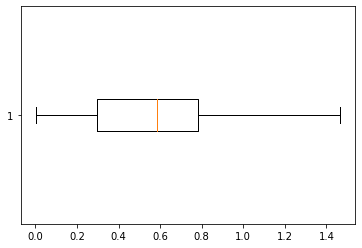

In [7]:
mtp.boxplot(cleaned_df['income_std'] , vert=False)

In [8]:
# Dropping the extra columns
cleaned_df1 = cleaned_df.drop(['income_std','gdpp_std','country'], axis=1)
cleaned_df1.shape

(145, 9)

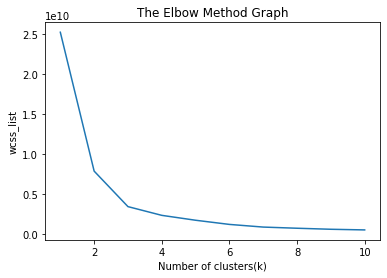

In [9]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(cleaned_df1)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

In [10]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(cleaned_df1)
cleaned_df2 = pd.DataFrame({'Cluster':y_predict, 'Country':cleaned_df.country, 'gdpp':cleaned_df1.gdpp, 'income':cleaned_df1.income, 'health':cleaned_df1.health})

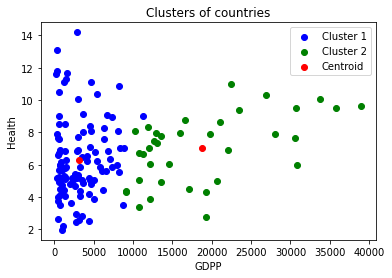

In [11]:
#visualizing the clusters  
mtp.scatter(cleaned_df2.gdpp[cleaned_df2.Cluster == 0], cleaned_df2.health[cleaned_df2.Cluster == 0], c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(cleaned_df2.gdpp[cleaned_df2.Cluster == 1], cleaned_df2.health[cleaned_df2.Cluster == 1], c = 'green', label = 'Cluster 2') #for second cluster  

mtp.scatter(kmeans.cluster_centers_[:, 8], kmeans.cluster_centers_[:, 2], c = 'red', label = 'Centroid')   
mtp.title('Clusters of countries')  
mtp.xlabel('GDPP')  
mtp.ylabel('Health')  
mtp.legend()  
mtp.show()  

In [12]:
cleaned_df2[cleaned_df2.Cluster==0].shape

(109, 5)

## 2nd Cycle

In [13]:
cleaned_df3 = cleaned_df2[cleaned_df2.Cluster==0]
cleaned_df4 = cleaned_df3.drop('Country', axis=1)

In [14]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(cleaned_df4)
cleaned_df5 = pd.DataFrame({'Cluster':y_predict, 'Country':cleaned_df3.Country, 'gdpp':cleaned_df4.gdpp, 'income':cleaned_df4.income, 'health':cleaned_df4.health})

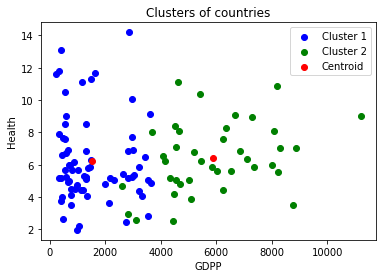

In [15]:
#visualizing the clusters  
mtp.scatter(cleaned_df5.gdpp[cleaned_df5.Cluster == 0], cleaned_df5.health[cleaned_df5.Cluster == 0], c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(cleaned_df5.gdpp[cleaned_df5.Cluster == 1], cleaned_df5.health[cleaned_df5.Cluster == 1], c = 'green', label = 'Cluster 2') #for second cluster  

mtp.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c = 'red', label = 'Centroid')   
mtp.title('Clusters of countries')  
mtp.xlabel('GDPP')  
mtp.ylabel('Health')  
mtp.legend()  
mtp.show()  

In [16]:
cleaned_df5[cleaned_df5.Cluster==0].shape

(70, 5)

## 3rd Cycle

In [17]:
cleaned_df6 = cleaned_df5[cleaned_df5.Cluster==0]
cleaned_df7 = cleaned_df6.drop('Country', axis=1)

In [18]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=2, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(cleaned_df7)
cleaned_df8 = pd.DataFrame({'Cluster':y_predict, 'Country':cleaned_df6.Country, 'gdpp':cleaned_df7.gdpp, 'income':cleaned_df7.income, 'health':cleaned_df7.health})

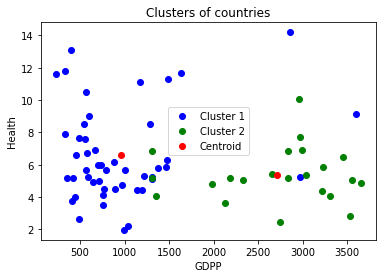

In [19]:
#visualizing the clusters  
mtp.scatter(cleaned_df8.gdpp[cleaned_df8.Cluster == 0], cleaned_df8.health[cleaned_df8.Cluster == 0], c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(cleaned_df8.gdpp[cleaned_df8.Cluster == 1], cleaned_df8.health[cleaned_df8.Cluster == 1], c = 'green', label = 'Cluster 2') #for second cluster  

mtp.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], c = 'red', label = 'Centroid')   
mtp.title('Clusters of countries')  
mtp.xlabel('GDPP')  
mtp.ylabel('Health')  
mtp.legend()  
mtp.show()

In [20]:
cleaned_df8[cleaned_df8.Cluster==0].shape

(48, 5)

In [21]:
kmeans.cluster_centers_

array([[0.00000000e+00, 9.61333333e+02, 2.10006250e+03, 6.63291667e+00],
       [0.00000000e+00, 2.70636364e+03, 6.05227273e+03, 5.38454545e+00]])

In [22]:
cleaned_df8[cleaned_df8.Cluster==0]

,Cluster,Country,gdpp,income,health
0,0,Afghanistan,553,1610,7.58
12,0,Bangladesh,758,2440,3.52
17,0,Benin,758,1820,4.10
25,0,Burkina Faso,575,1430,6.74
26,0,Burundi,231,764,11.60
27,0,Cambodia,786,2520,5.68
28,0,Cameroon,1310,2660,5.13
31,0,Central African Republic,446,888,3.98
32,0,Chad,897,1930,4.53
36,0,Comoros,769,1410,4.51
